# Исследовательский анализ данных Google Play Store

## Описание проекта

**Задача:** Провести полный цикл анализа данных мобильного маркетплейса Google Play Store — от первичной обработки и очистки данных до исследовательского анализа (EDA) и визуализации.

**Используемый стек:**
- Python • Pandas • NumPy • Matplotlib • Seaborn
- **Методы:** Data Cleaning, Feature Engineering, EDA, Визуализация

**Ключевые этапы анализа:**
1. Первичный осмотр и оценка качества данных
2. Предобработка: обработка пропусков, аномалий, преобразование типов
3. Работа с дубликатами и целостностью данных  
4. Исследовательский анализ (EDA) и визуализация
5. Формулировка бизнес-инсайтов и выводов

**О наборе данных:**
Датасет содержит 10k+ записей о приложениях из Google Play Store с различными метриками: категория, рейтинг, количество отзывов, размер, количество установок, тип (бесплатное/платное), цена, возрастной рейтинг, жанры и др.

## Колонки таблицы 

**App**– название приложения

**Category** – категория

**Rating** – средний рейтинг (от 1 до 5)

**Reviews** – количество отзывов

**Size** – размер приложения 

**Installs** – количество установок 

**Type** – Free или Paid (бесплатное или платное)

**Price** – цена (0 для бесплатных приложений)

**Content Rating** – возрастной рейтинг (Everyone, Teen, 18+ и т.д.)

**Genres** – жанр или несколько жанров

**Last Updated** – дата последнего обновления

**Current Ver** – текущая версия

**Android Ver** – минимальная версия Android

## 1. Импорт библиотек, загрузка данных и первоначальное исследование

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
apps = pd.read_csv("googleplaystore.csv")
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [247]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [249]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 2. Предобработка

### 2.1 Очистка пропусков и странных данных

In [253]:
apps['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [255]:
apps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [257]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [259]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

     
**Некоторые колонки имеют странные значения**   
  Напрмер, в 'Category' присутствует значение '1.9', а в 'Rating' присутствует значение 19 (хотя в Google Play рейтинг находится в диапазоне ) что является довольно странным.   
  Выведем эти строки, чтобы оценить их.

In [262]:
apps[(apps['Category']=='1.9') | (apps['Rating']==19)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Видим, что строка имеет все те "странные значения", которые встретились выше.  
 Похоже, данные сдвинулись на одно значение влево.   
   Удалим эту строку, так как чинить её не имеет особого смысла.

In [ ]:
# Удаляем эту строку
apps.drop(apps[apps['Price']=='Everyone'].index, inplace=True) 

**Уберем пропуски**

In [268]:
 #Пропуски в `Rating` заменяем медианой (чтобы сохранить распределение)
apps['Rating'] = apps['Rating'].fillna(apps['Rating'].median())
#Пропуски в `Type` заменяем на `Free`, так как большинство приложений бесплатные
apps['Type'] = apps['Type'].fillna('Free') 

In [270]:
apps[apps['Content Rating']=='Unrated'].shape[0]

2

В колонке Content Rating встречалось 2 значения Unrated. Их сохранил как отдельную категорию, так как это отражает реальную ситуацию — некоторые приложения в Google Play могли не пройти проверку оценки.

### 2.2 Преобразование типов
Некоторые столбцы в исходном датасете имели строковый (object) тип, хотя по смыслу представляли числовые или временные значения.  
Для корректного анализа и визуализаций необходимо привести их к подходящим типам данных.


In [274]:
# Reviews — преобразуем в int
apps['Reviews'] = apps['Reviews'].astype('int')

# Installs — убираем символы ',' и '+', переводим в int
apps['Installs'] = apps['Installs'].apply(lambda x: int(str(x).replace(',', '').replace('+', '')))

# Price — убираем знак '$' и преобразуем в float
apps['Price'] = apps['Price'].apply(lambda x: float(str(x).replace('$', '')))

# Last Updated - преобразуем в дату 
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

In [276]:
# Size — приводим к числовому виду (в мегабайтах)
def size_to_mb(x):
    if 'M' in x:
        return float(x.replace('M', ''))
    elif 'k' in x:
        return float(x.replace('k', ''))/1024
    else:
        return np.nan

apps['Size'] = apps['Size'].apply(size_to_mb)

### 2.3 Очистка дубликатов

In [279]:
#Проверим дубликаты
print(f"Кол-во дубликатов: {apps.duplicated().sum()}")

Кол-во дубликатов: 483


In [281]:
#Удалим дубликаты
apps = apps.drop_duplicates().reset_index(drop=True)
print(f"Кол-во дубликатов после удаления дубликатов: {apps.duplicated().sum()}")

Кол-во дубликатов после удаления дубликатов: 0


In [283]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          10357 non-null  float64       
 3   Reviews         10357 non-null  int32         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int64         
 6   Type            10357 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 1011.6+ KB


## 3. Исследовательский анализ (EDA)


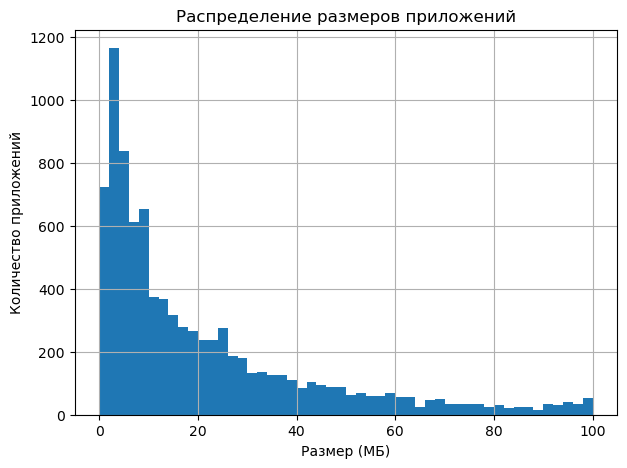

In [308]:
#Распределение размеров приложений
plt.figure(figsize=(7, 5))
apps['Size'].hist(bins=50)
plt.title('Распределение размеров приложений')
plt.xlabel('Размер (МБ)')
plt.ylabel('Количество приложений')
plt.show()

Большинство приложений имеют небольшой размер (до 50 МБ), что соответствует модели быстрой загрузки и экономии памяти устройств.

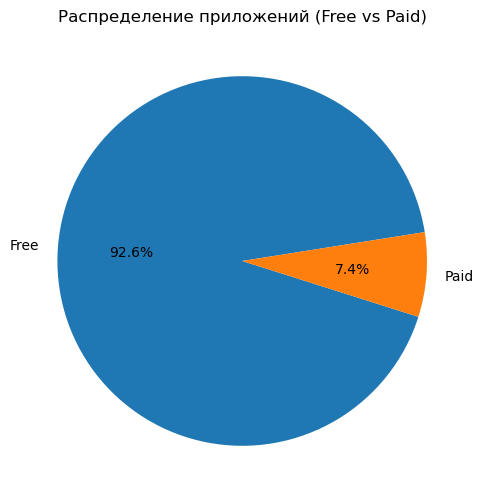

In [320]:
#Распределение приложений
plt.figure(figsize=(6, 6))
plt.pie(apps['Type'].value_counts(), labels=type_counts.index, autopct='%1.1f%%', startangle=9)
plt.title('Распределение приложений (Free vs Paid)')
plt.show()

Рынок приложений Google Play Store доминирует бесплатная модель монетизации. Бесплатные приложения составляют абсолютное большинство (около 92%)

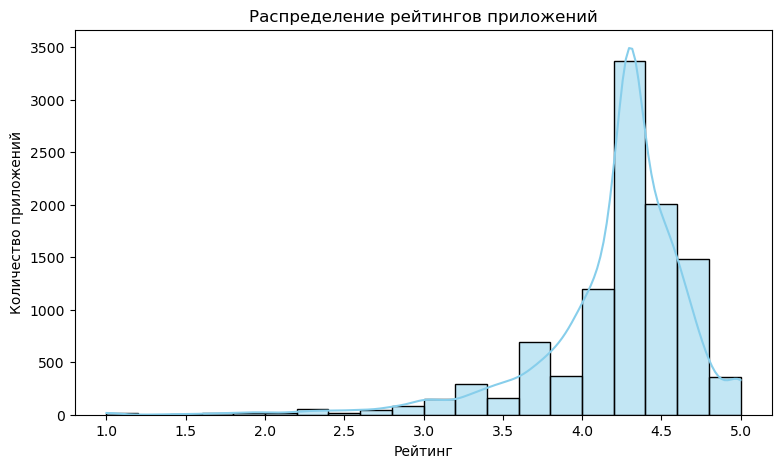

count    10357.000000
mean         4.203737
std          0.485594
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [186]:
#Распределение рейтингов приложений.
plt.figure(figsize=(9,5))
sns.histplot(apps['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Распределение рейтингов приложений')
plt.xlabel('Рейтинг')
plt.ylabel('Количество приложений')
plt.show()

apps['Rating'].describe()

Большинство приложений имеют рейтинг выше 4.0 — значит, в магазине преобладают качественные продукты.

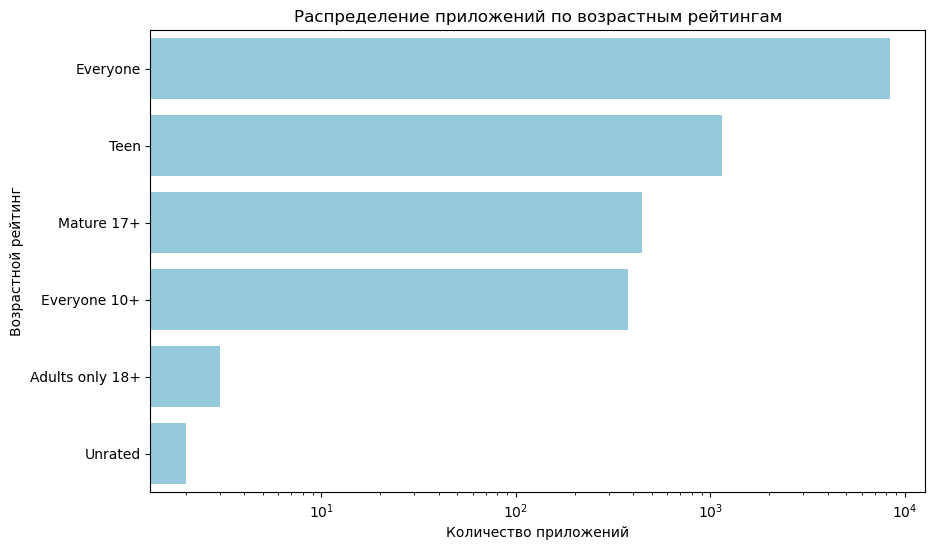

In [188]:
#Распределение приложений по возрастным рейтингам
content_rating_counts = apps['Content Rating'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=content_rating_counts.values, y=content_rating_counts.index, color='skyblue')
plt.xscale('log')
plt.title('Распределение приложений по возрастным рейтингам')
plt.ylabel('Возрастной рейтинг')
plt.xlabel('Количество приложений')
plt.show()

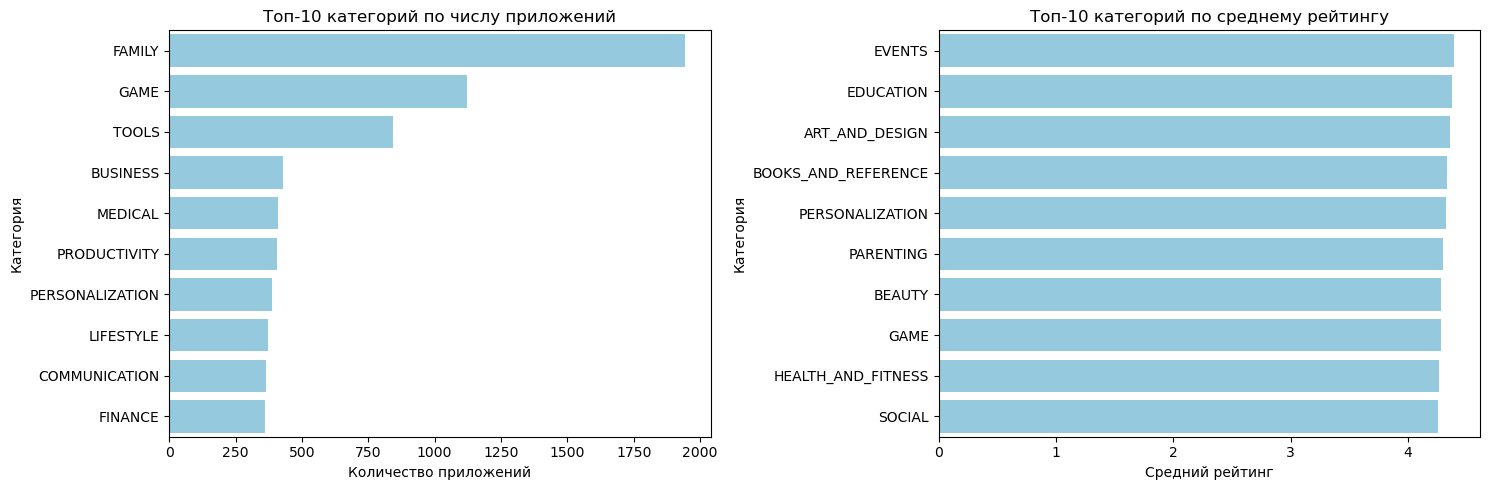

In [190]:
top_10_category = apps['Category'].value_counts().head(10)
top_10_ratings = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,5))

#Топ-10 категорий по числу приложений
plt.subplot(1,2,1)
sns.barplot(x=top_10_category.values, y=top_10_category.index, color='skyblue')
plt.title('Топ-10 категорий по числу приложений')
plt.xlabel('Количество приложений')
plt.ylabel('Категория')

# Топ-10 категорий по среднему рейтингу
plt.subplot(1,2,2)
sns.barplot(x=top_10_ratings.values, y=top_cat_ratings.index, color='skyblue')
plt.title('Топ-10 категорий по среднему рейтингу')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')

plt.tight_layout()
plt.show()

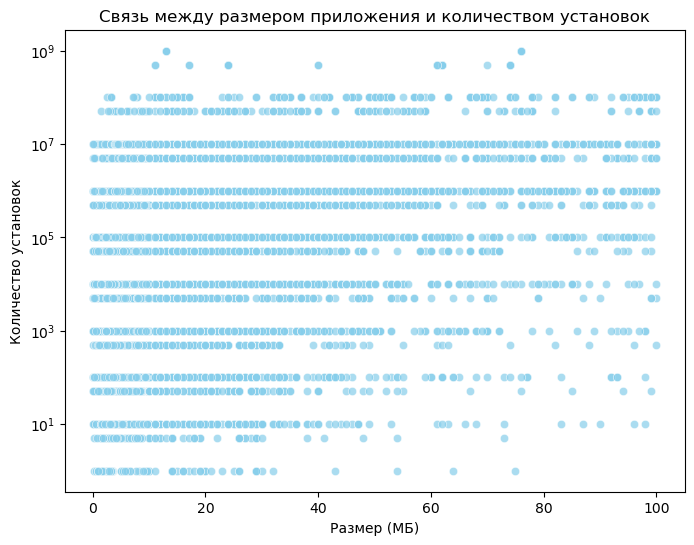

In [191]:
#Связь между размером приложения и количеством установок
plt.figure(figsize=(8,6))
sns.scatterplot(data=apps, x='Size', y='Installs', alpha=0.7, color='skyblue')
plt.title('Связь между размером приложения и количеством установок')
plt.xlabel('Размер (МБ)')
plt.ylabel('Количество установок')
plt.yscale('log')  
plt.show()

Явная линейная зависимость отсутсвует.

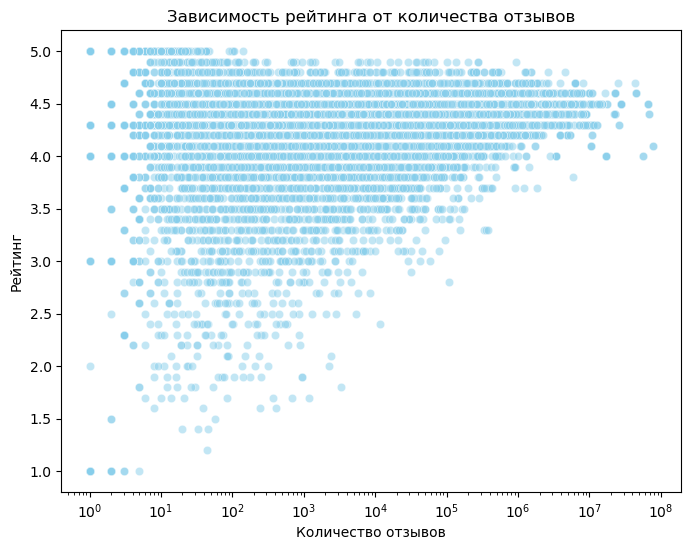

In [193]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=apps, x='Reviews', y='Rating', alpha=0.5, color='skyblue')
plt.title('Зависимость рейтинга от количества отзывов')
plt.xlabel('Количество отзывов')
plt.ylabel('Рейтинг')
plt.xscale('log')
plt.show()

Низкий рейтинг, только у тех приложений, на которые оставили мало отзывов. Приложения с большим числом отзывов часто имеют выше рейтинг.

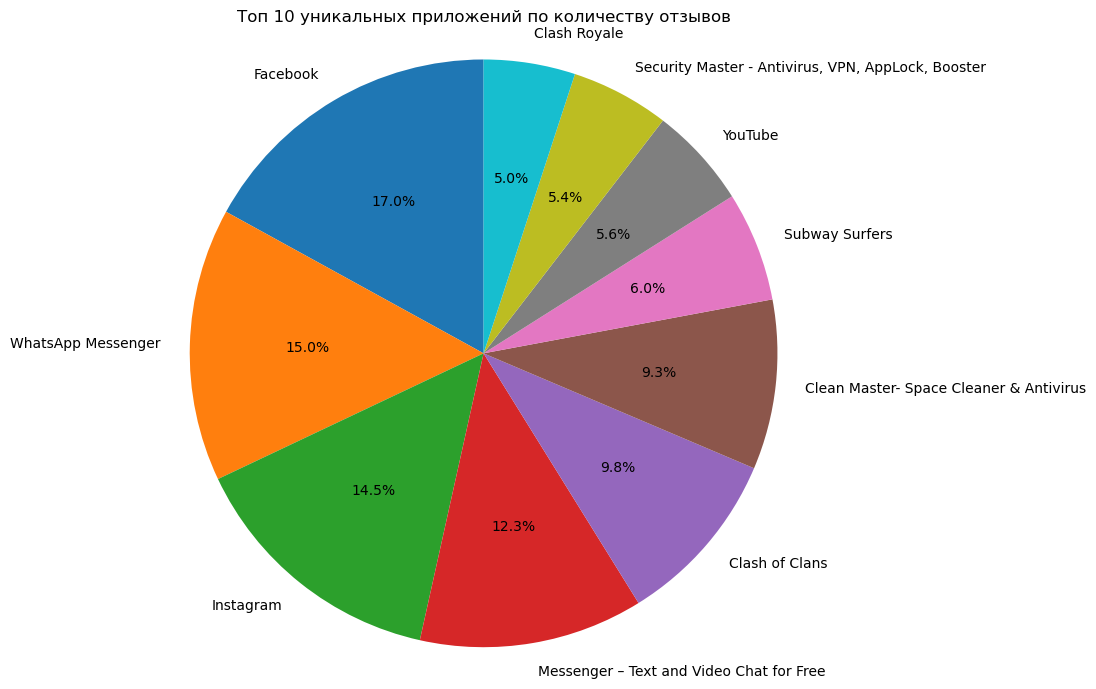

In [342]:
distinct_apps = apps.drop_duplicates(subset='App', keep='first')  # Сохраняем первое появление каждого приложения
top_reviewed_apps = distinct_apps.sort_values(by='Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_reviewed_apps['Reviews'], labels=top_reviewed_apps['App'], autopct='%1.1f%%', startangle=90)
plt.title('Топ 10 уникальных приложений по количеству отзывов')
plt.axis('equal')
plt.tight_layout()
plt.show()

Мессенджеры и соцсети занимают большую часть отзывов в Google Play.

## ЗАКЛЮЧЕНИЕ
Основываясь на результатах загрузки, очистки и предварительного анализа данных, которые мы провели в наборе данных Google Play Store, ниже приводится подробное заключение:

**Обзор и очистка данных:** Мы начали с набора данных, содержащего информацию о 10840 приложениях Google Play Store. Первоначальное исследование выявило наличие повторяющихся записей и пропущенных значений в столбцах: "Rating", "Type", "Content Rating", "Current Ver" и "Android Ver". Эти проблемы были решены за счет удаления "сломанной" строки, удаления строк дубликатов, пропуски заполнены медианой. В столбцах "Current Ver" и "Android Ver" пропуски оставили, так как эти столбцы в анализе данных не пригодились. В столбце "Size" пропуски были оставлены из-за того, что некоторые приложения определяют занимаемую постоянную память в зависимости от устройства. Мы также преобразовали столбцы "Size", "Installs" и "Price" в числовые форматы для количественного анализа. 

**Основные результаты предварительного анализа данных:**  
-_Средняя оценка_: Средняя оценка приложений в этом наборе данных равняется приблизительно 4.19, что указывает на в целом положительное отношение пользователей к приложениям, включенным в него.  
-_Уникальные категории_: В наборе данных представлены множество уникальных категорий приложений, отображающие широкий спектр типов приложений, доступных в Play Store.  
-_Распределение размеров приложений_: Распределение размеров приложений смещено в сторону меньших размеров, при этом размер большинства приложений не превышает 50 МБ, что соответствует модели быстрой загрузки и экономии памяти устройств. Наблюдается значительное количество приложений с размером около 0 МБ, что может указывать на приложения, чей основной контент подгружается после установки.
-_Бесплатные приложения по сравнению с платными_: Рынок приложений Google Play Store доминирует бесплатная модель монетизации. Бесплатные приложения составляют абсолютное большинство (около 92%). Платные приложения занимают нишевую долю рынка (~8%). Это подтверждает современные тренды монетизации через рекламу и встроенные покупки.
-_Распределение рейтинга контента_: Наиболее распространенный рейтинг контента - "Everyone", что указывает на то, что значительная часть приложений подходит для всех возрастных групп. Следующими по частоте рейтингов являются "Teen" и "Mature 17+".  
-_Кол-во приложений по категориям_: Наиболее распространенная категория: "Family". После идут "Game" и "Tools". Видим, что Google Play Store не зациклен под какую-то одну категорию, а предоставляет обширный набор для разных пользователей.   
-_Категории по среднему рейтингу_: Все категории имеют примерно одинаковую высокую оценку среди пользователей.  
-_Связь между размером приложения и количеством установок_: Явная линейная зависимость отсутсвует. Размер приложения не является определяющим фактором для количества установок.  
-_Зависимость рейтинга от количества отзывов_:  Низкий рейтинг, только у тех приложений, на которые оставили мало отзывов. Приложения с большим числом отзывов часто имеют выше рейтинг.  
-_Самые популярные приложения по количеству отзывов_: Мессенджеры и соцсети (Facebook, WhatsApp Messenger, Instagram, Messenger - Text and Video Chat for free) занимают большую часть отзывов в Google Play

**Общий вывод:** Проведённый анализ показывает, что Google Play Store характеризуется высокой конкуренцией, доминированием бесплатных приложений и в целом положительными пользовательскими оценками. Большинство приложений создаются для широкой аудитории и имеют высокий рейтинг, что отражает зрелость и насыщенность рынка. Полученные результаты дают хорошую основу для дальнейших аналитических исследований.